In [1]:
import pandas as pd
import random
from faker import Faker
from collections import defaultdict

# Initialize Faker for Pakistani data
fake = Faker('en_PK')

# Real Pakistani companies (major corporations)
pakistani_companies = [
    "PTCL", "Engro Corporation", "Jazz", "UBL", "HBL", 
    "MCB Bank", "Lucky Cement", "FFC", "OGDCL", "PIA",
    "Pak Elektron", "Nishat Group", "Habib Bank", "Arif Habib Group",
    "Systems Limited", "TRG Pakistan", "EFU Life", "Adamjee Insurance",
    "Fauji Fertilizer", "Indus Motors", "Pak Suzuki", "Nestlé Pakistan",
    "Unilever Pakistan", "Coca-Cola Pakistan", "PepsiCo Pakistan"
]

# Pakistani cities with provinces
pakistani_cities = {
    'Karachi': 'Sindh',
    'Lahore': 'Punjab',
    'Islamabad': 'ICT',
    'Faisalabad': 'Punjab',
    'Rawalpindi': 'Punjab',
    'Multan': 'Punjab',
    'Peshawar': 'KP',
    'Quetta': 'Balochistan',
    'Gujranwala': 'Punjab',
    'Sialkot': 'Punjab',
    'Hyderabad': 'Sindh',
    'Sargodha': 'Punjab'
}

# Roles with Pakistani context
roles = {
    "Sales Executive": {"arrangement": ["Hybrid", "On-site"], "travel": "High"},
    "Field Engineer": {"arrangement": ["On-site"], "travel": "Very High"},
    "Bank Manager": {"arrangement": ["On-site"], "travel": "Medium"},
    "IT Consultant": {"arrangement": ["Hybrid", "Remote"], "travel": "Medium"},
    "Supply Chain Manager": {"arrangement": ["Hybrid"], "travel": "High"},
    "Telecom Technician": {"arrangement": ["On-site"], "travel": "Extreme"},
    "Marketing Manager": {"arrangement": ["Hybrid"], "travel": "Medium"},
    "Data Analyst": {"arrangement": ["Remote", "Hybrid"], "travel": "Low"},
    "Business Analyst": {"arrangement": ["Hybrid"], "travel": "Medium"},
    "Project Manager": {"arrangement": ["Hybrid"], "travel": "High"}
}

# Pakistani-specific travel reasons
travel_reasons = [
    "Client Meeting",
    "Branch Visit",
    "Equipment Maintenance",
    "Dealer Training",
    "Vendor Negotiation",
    "Site Inspection",
    "Regulatory Compliance",
    "Team Workshop",
    "Product Launch",
    "Stakeholder Meeting"
]

# Generate dataset
data = []
for _ in range(2000):
    company = random.choice(pakistani_companies)
    role, role_info = random.choice(list(roles.items()))
    arrangement = random.choice(role_info["arrangement"])
    travel_profile = role_info["travel"]
    
    # HQ location
    hq_city, province = random.choice(list(pakistani_cities.items()))
    hq = f"{hq_city}, {province}"
    
    # Determine destinations
    num_destinations = {
        "Low": random.randint(0, 1),
        "Medium": random.randint(1, 2),
        "High": random.randint(2, 3),
        "Very High": random.randint(3, 4),
        "Extreme": random.randint(4, 5)
    }[travel_profile]
    
    destinations = []
    for _ in range(num_destinations):
        dest_city, dest_province = random.choice(list(pakistani_cities.items()))
        destinations.append(f"{dest_city}, {dest_province}")
    
    if not destinations:
        destinations = ["None"]
    
    # Reasons for travel
    reasons = random.sample(travel_reasons, k=random.randint(1, 2))
    
    data.append({
        "Company": company,
        "Role": role,
        "Work_Arrangement": arrangement,
        "Travel_Profile": travel_profile,
        "HQ": hq,
        "Destinations": "; ".join(destinations),
        "Frequency": random.choice(["Weekly", "Bi-weekly", "Monthly", "Quarterly"]),
        "Trip_Duration_Days": random.randint(1, 14),
        "Reason_for_Travel": "; ".join(reasons)
    })

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("pakistani_company_travel_data.csv", index=False)
print("Generated dataset with", len(df), "rows")

# Sample output
print("\nSample Data:")
print(df.sample(5).to_markdown(index=False)) 

Generated dataset with 2000 rows

Sample Data:
| Company           | Role              | Work_Arrangement   | Travel_Profile   | HQ                 | Destinations                                                                | Frequency   |   Trip_Duration_Days | Reason_for_Travel                          |
|:------------------|:------------------|:-------------------|:-----------------|:-------------------|:----------------------------------------------------------------------------|:------------|---------------------:|:-------------------------------------------|
| Unilever Pakistan | Project Manager   | Hybrid             | High             | Sargodha, Punjab   | Quetta, Balochistan; Sargodha, Punjab; Faisalabad, Punjab                   | Monthly     |                    6 | Stakeholder Meeting; Regulatory Compliance |
| Habib Bank        | Project Manager   | Hybrid             | High             | Peshawar, KP       | Karachi, Sindh; Rawalpindi, Punjab                           

In [2]:
df

,Company,Role,Work_Arrangement,Travel_Profile,HQ,Destinations,Frequency,Trip_Duration_Days,Reason_for_Travel
0,UBL,Data Analyst,Hybrid,Low,"Sialkot, Punjab","Quetta, Balochistan",Bi-weekly,5,Dealer Training; Product Launch
1,MCB Bank,Marketing Manager,Hybrid,Medium,"Sialkot, Punjab","Hyderabad, Sindh; Faisalabad, Punjab",Monthly,12,Equipment Maintenance; Site Inspection
2,Habib Bank,Business Analyst,Hybrid,Medium,"Islamabad, ICT","Gujranwala, Punjab; Karachi, Sindh",Bi-weekly,14,Team Workshop
3,PIA,Bank Manager,On-site,Medium,"Rawalpindi, Punjab","Rawalpindi, Punjab",Monthly,11,Regulatory Compliance
4,Nishat Group,Bank Manager,On-site,Medium,"Rawalpindi, Punjab","Peshawar, KP; Peshawar, KP",Monthly,2,Team Workshop
...,...,...,...,...,...,...,...,...,...
1995,HBL,Project Manager,Hybrid,High,"Sargodha, Punjab","Peshawar, KP; Faisalabad, Punjab",Quarterly,9,Site Inspection
1996,Unilever Pakistan,Data Analyst,Remote,Low,"Faisalabad, Punjab","Gujranwala, Punjab",Weekly,9,Stakeholder Meeting
1997,Nishat Group,Field Engineer,On-site,Very High,"Islamabad, ICT","Quetta, Balochistan; Quetta, Balochistan; Gujr...",Weekly,13,Vendor Negotiation
1998,Nishat Group,Supply Chain Manager,Hybrid,High,"Lahore, Punjab","Sialkot, Punjab; Sargodha, Punjab",Weekly,7,Branch Visit; Vendor Negotiation


In [3]:
from sqlalchemy import create_engine

In [4]:
# Create SQLite in-memory database
engine = create_engine('sqlite:///company_travel.db')

# Save DataFrame to SQL database
df.to_sql('travel', engine, index=False, if_exists='replace')

In [5]:
%load_ext sql

# Connect to database
%sql sqlite:///company_travel.db

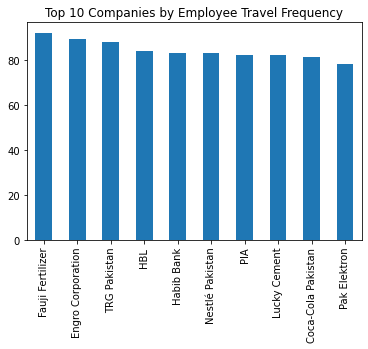

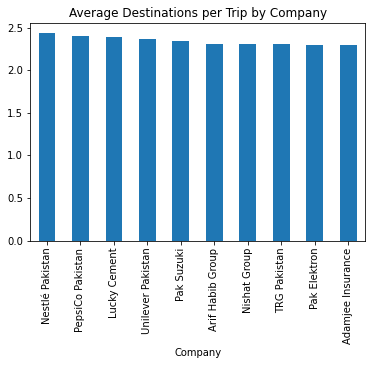

In [11]:
# Companies with most traveling employees
import matplotlib.pyplot as plt
import seaborn as sns

travel_counts = df[df['Destinations'] != 'None']['Company'].value_counts().head(10)
travel_counts.plot(kind='bar')
plt.title('Top 10 Companies by Employee Travel Frequency')
plt.show()

# Average destinations per company
df['num_destinations'] = df['Destinations'].apply(lambda x: 0 if x == 'None' else len(x.split('; ')))
df.groupby('Company')['num_destinations'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Average Destinations per Trip by Company')
plt.show()

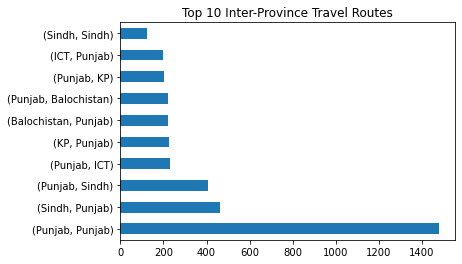

In [13]:
# Travel between provinces
df['HQ_Province'] = df['HQ'].str.split(', ').str[1]
df['Dest_Provinces'] = df['Destinations'].apply(lambda x: [d.split(', ')[1] for d in x.split('; ') if d != 'None'])

# Create province-to-province travel matrix
province_pairs = []
for _, row in df.iterrows():
    if row['Dest_Provinces']:
        for dest in row['Dest_Provinces']:
            province_pairs.append((row['HQ_Province'], dest))

pair_counts = pd.Series(province_pairs).value_counts().head(10)
pair_counts.plot(kind='barh')
plt.title('Top 10 Inter-Province Travel Routes')
plt.show()

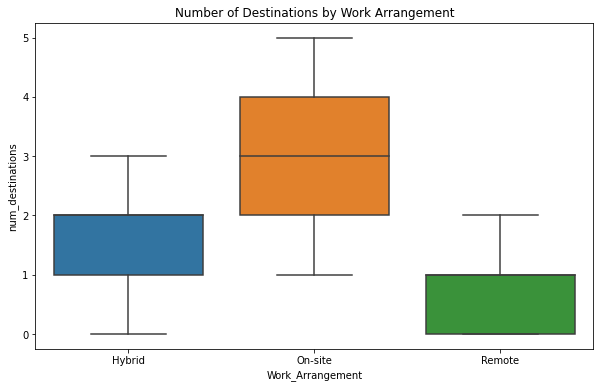

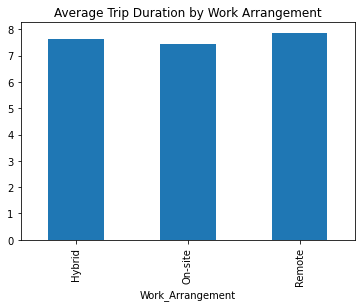

In [14]:
# Travel frequency by work arrangement
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Work_Arrangement', y='num_destinations')
plt.title('Number of Destinations by Work Arrangement')
plt.show()

# Trip duration by arrangement
df.groupby('Work_Arrangement')['Trip_Duration_Days'].mean().plot(kind='bar')
plt.title('Average Trip Duration by Work Arrangement')
plt.show()

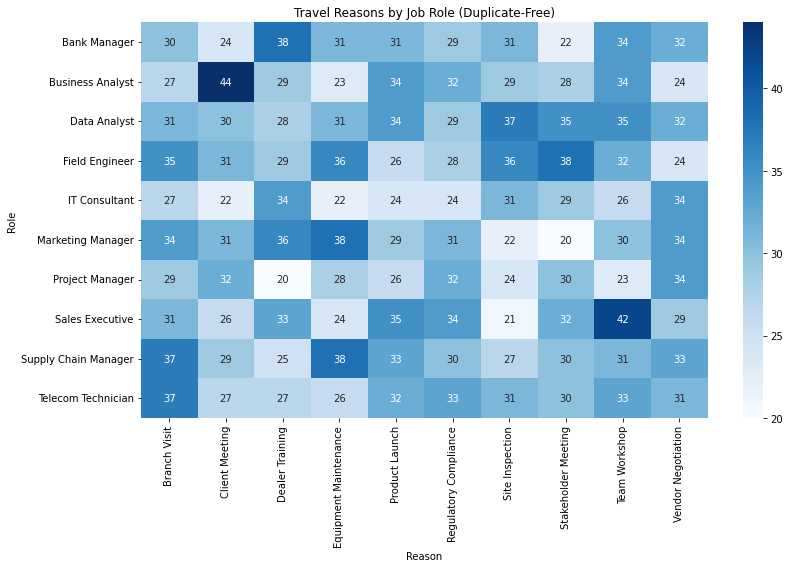

In [18]:
# Create a clean reason-role mapping
clean_data = []
for _, row in df.iterrows():
    reasons = row['Reason_for_Travel'].split('; ')
    for reason in reasons:
        clean_data.append({
            'Role': row['Role'],
            'Reason': reason
        })
clean_df = pd.DataFrame(clean_data)

# Now generate crosstab safely
reason_by_role = pd.crosstab(
    index=clean_df['Role'],
    columns=clean_df['Reason']
)

# Plotting remains the same
plt.figure(figsize=(12,8))
sns.heatmap(reason_by_role, cmap='Blues', annot=True, fmt='d')
plt.title('Travel Reasons by Job Role (Duplicate-Free)')
plt.tight_layout()
plt.show()